# ECE 5470 Lab 2 Report

## by Junjie Tian

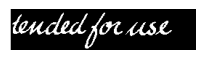

im1.vx
<scaled size: (56 x 256) >


In [ ]:
import numpy as np
from v4 import vx
from v4 import vd

vd.dispmvx("im1.vx", size=0.3, capt="im1.vx")

### Section 2

In [2]:
# Execute Command
! chmod +x vtempy
! vtempy if=im1.vx of=im1.mx

'chmod' �����ڲ����ⲿ���Ҳ���ǿ����еĳ���
���������ļ���
'vtempy' �����ڲ����ⲿ���Ҳ���ǿ����еĳ���
���������ļ���


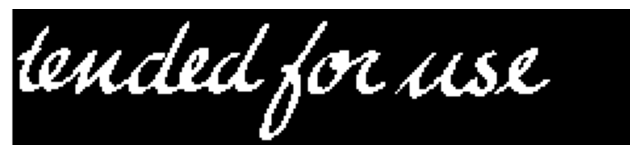

Input Image
<scaled size: (56 x 256) >


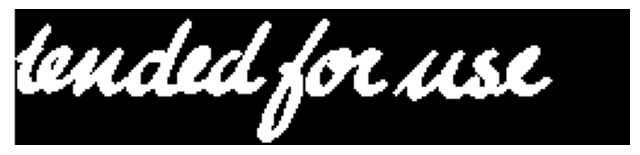

Output Image
<scaled size: (56 x 256) >


In [3]:
# Display Images
vd.dispmvx("im1.vx", capt="Input Image")
vd.dispmvx("im1.mx", capt="Output Image")

Introduction of two images:
The input image is the original image and is put into the program 'vtempy' as the input. The output image is the output of the local max filter.

The output image shows characters with thicker lines. The reason is that the pixel value of a location is determined by the maximum pixel value of its neighbors. For example, the middle of letter "o" and "e" is occupied with more white ink because they take the maximum pixel value of neighbors. Thus, the white lines are 'expanded' into the surrounding black pixels, and the white lines are thicker in the output image.

### Section 3
#### 3.1 Test image presentation

In [4]:
# Code to convert from .csv to .vx
import pandas as pd
def vxread_csv( ifile, whitespace=False):
    ''' read a csv file or file with whitespace separators
        and return vx ubyte image file
        only 2D images supported
    '''
    if whitespace:
        df = pd.read_csv(ifile, header=None, sep='\s+')
    else:
        df = pd.read_csv(ifile, header=None, )
    return vx.Vx(df.to_numpy(dtype='uint8', copy=True))

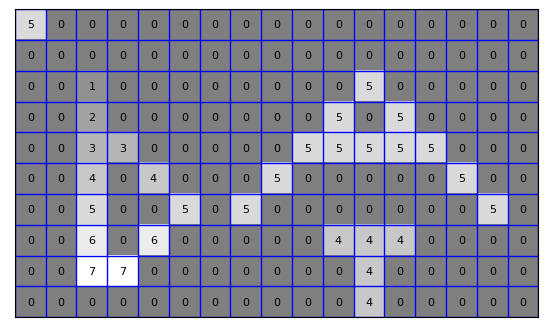

Input Test Image
<scaled size: (10 x 17) >


CalledProcessError: Command ' vrawtovx -t tstimg.csv | vdim -c of=tmp.vxpy.6432.1' returned non-zero exit status 255.

In [5]:
# Read in the test image
small_test_in = vxread_csv('tstimg.csv')
vd.dispmvx(small_test_in, pvalues=True, capt="Input Test Image")

# Execute Command
small_test_out = vx.Vx()
exec(vx.vxsh( 'vrawtovx -t tstimg.csv | vdim -c of=$small_test_in' ))
exec(vx.vxsh( 'vtempy if=$small_test_in of=$small_test_out'))
vd.dispmvx(small_test_out, pvalues=True, capt="Output Test Image")

The vtempy works well on the test image. The following are some evidence of correct operation of the algorithm.

1. On the top-left corner, there is one pixel with value of 5. In the output image, the pixels on the right of and below the pixel also becomes 5, as they take the maximum neighboring pixel values. This shows that the algorithm can handle the cases when non-zero pixel values are on the corners.
2. In the left part of the input image, there is a letter 'b'. After the operation, the letter becomes a triangle shape as the middle white part is occupied by neighboring non-zero pixel values. Besides, the color of the area generally becomes brighter, as the 'local maximum' operation always takes larger pixel values.
3. In the right part of the input image, the capital letter 'A' and 'T' are entered into the algorithm. In the output, the middle part of 'A' becomes gray, which supports that the algorithm works correctly. Besides, the two areas of 'A' and 'T' are connected into one big area as some zero pixels become non-zero pixels by taking maximum neighboring values.

### Section 4 (Bound)
#### 4.1 Program description

In this program, I first make a copy of the original image. I will use the values in the copied image and put the new pixel values on the original image.
Firstly, I loop through all pixels and record background pixels (value=0) into a set. Then I go through all pixels again; if the pixel has a neighbor that is in background pixel set, then the pixel is put into the boundary set. All other pixels are in the interior pixel set. Lastly, I label those three types of pixels according to the instructions in the question.


#### 4.2. Python Program code

The standalone project is in the below cell.

#### 4.3. Example of working program

Discussion of the Result: In the small test image, the program works as expected. 
According to the requirement of the function, a pixel can be labeled as 128 (interior pixel) only if all surrounding pixels of it are objects. In the test image, only a few pixels in the middle region are interior while other pixels are all boundary pixels. The result is as expected.

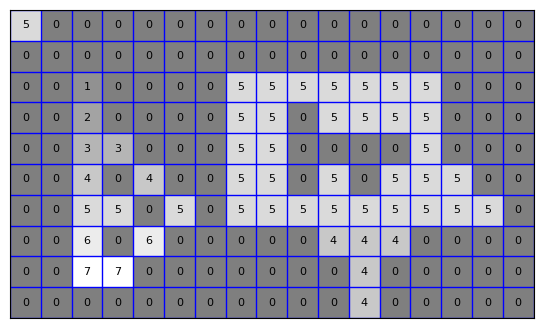

Input Test Image
<scaled size: (10 x 17) >


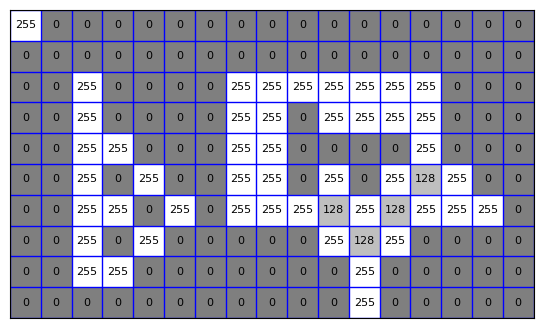

Output Test Image
<scaled size: (10 x 17) >


In [128]:
# Read in the test image
q4_small_test_in = vxread_csv('q4_test.csv')
vd.dispmvx(q4_small_test_in, pvalues=True, capt="Input Test Image")

# Execute Command
! chmod +x vboundary
q4_small_test_out = vx.Vx()
exec(vx.vxsh( 'vrawtovx -t q4_test.csv | vdim -c of=$q4_small_test_in' ))
exec(vx.vxsh( 'vboundary if=$q4_small_test_in of=$q4_small_test_out'))
vd.dispmvx(q4_small_test_out, pvalues=True, capt="Output Test Image")

#### 4.4 Examples on full size images

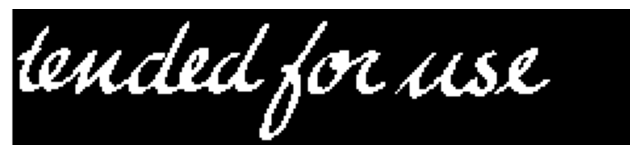

Input Test Image
<scaled size: (56 x 256) >


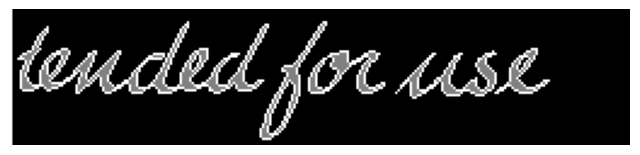

Output Test Image
<scaled size: (56 x 256) >


In [129]:
# Run the program on im1.vx
vd.dispmvx("im1.vx", capt="Input Test Image")

# Execute Command
! chmod +x vboundary
q4_test_out = vx.Vx()
exec(vx.vxsh( 'vboundary if=im1.vx of=$q4_test_out'))
vd.dispmvx(q4_test_out, capt="Output Test Image")

Discussion: As the edges of the characters are white and the interior pixels are in gray, the program works as expected.

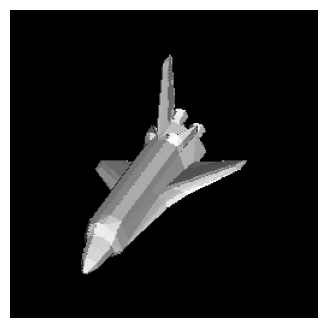

Input Test Image
<scaled size: (256 x 256) >


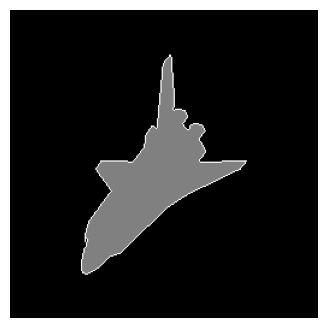

Output Test Image
<scaled size: (256 x 256) >


In [130]:
# Run the program on shuttle.vx
vd.dispmvx("shuttle.vx", capt="Input Test Image")

# Execute Command
! chmod +x vboundary
q4_test_out = vx.Vx()
exec(vx.vxsh( 'vboundary if=shuttle.vx of=$q4_test_out'))
vd.dispmvx(q4_test_out, capt="Output Test Image")

Discussion: The program correctly labeled the single object in the image.

### Section 5.(clabel)

#### 5.1 Porgram description

In this program, I first make a copy of the original image. I will use the values in the copied image and put the new pixel values on the original image.
Initially, I assign the current_num to be 1 (label the first object as 1). Then I use a recursive approach: if a non-zero pixel is found, I will check all its neighboring pixels and apply the function recursively until all pixels of this object it labeled. Then the current_num will increse by 1.

The python code is given in the next cell.

#### 5.2 Small image tests
        

In [131]:
import sys
sys.setrecursionlimit(9999)

In [1]:
# A small test image that contains 9 connected components
q5_small_test_in = vxread_csv('q5_test_1.csv')
vd.dispmvx(q5_small_test_in, pvalues=True, capt="Input Test Image")

# Execute Command
! chmod +x vcclabel
q5_small_test_out = vx.Vx()
exec(vx.vxsh( 'vrawtovx -t q5_test_1.csv | vdim -c of=$q5_small_test_in' ))
exec(vx.vxsh( 'vcclabel if=$q5_small_test_in of=$q5_small_test_out'))

vd.dispmvx(q5_small_test_out, pvalues=True, capt="Output Test Image")

NameError: name 'vxread_csv' is not defined

Discussion: The first small test image shows that the program works as expected. In the above image, 
there are following cases: a single component at the corner, a single component in the middle, and two components with two pixels that are
diagonally connected but don't satisfy 4-connection condition. The program can handle those cases appropriately.

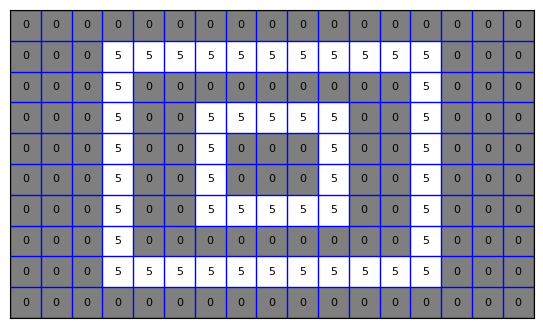

Input Test Image
<scaled size: (10 x 17) >


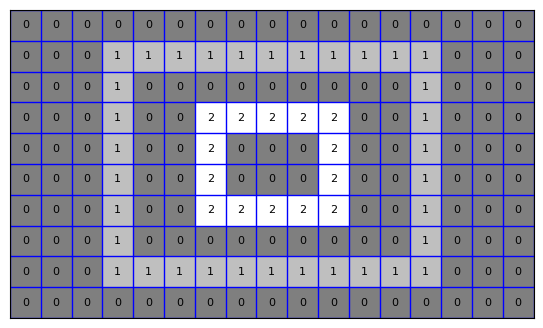

Output Test Image
<scaled size: (10 x 17) >


In [133]:
# A small test image that contains one component inside another component (separated by zeros).
q5_small_test_in = vxread_csv('q5_test_2.csv')
vd.dispmvx(q5_small_test_in, pvalues=True, capt="Input Test Image")

# Execute Command
q5_small_test_out = vx.Vx()
exec(vx.vxsh( 'vrawtovx -t q5_test_2.csv | vdim -c of=$q5_small_test_in' ))
exec(vx.vxsh( 'vcclabel if=$q5_small_test_in of=$q5_small_test_out'))

vd.dispmvx(q5_small_test_out, pvalues=True, capt="Output Test Image")

Discussion: The second small test image shows that the program works as expected.
The large circle of pixel values of 5 is one object, and the small circle represents another object.
These two objects are not connected and should be given different labels.

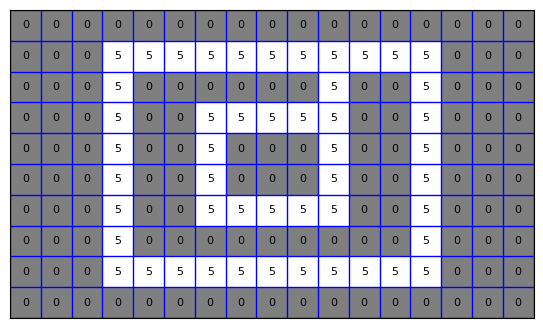

Input Test Image
<scaled size: (10 x 17) >


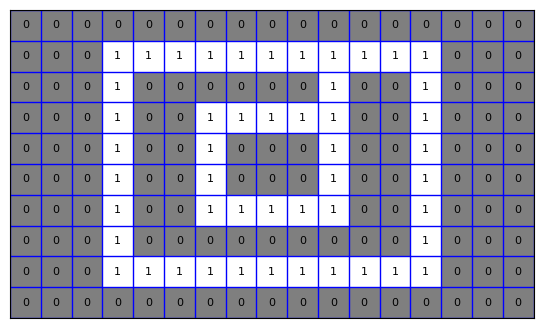

Output Test Image
<scaled size: (10 x 17) >


In [134]:
# The example in (b) where the two components are connected by a single pixel
q5_small_test_in = vxread_csv('q5_test_3.csv')
vd.dispmvx(q5_small_test_in, pvalues=True, capt="Input Test Image")

# Execute Command
q5_small_test_out = vx.Vx()
exec(vx.vxsh( 'vrawtovx -t q5_test_3.csv | vdim -c of=$q5_small_test_in' ))
exec(vx.vxsh( 'vcclabel if=$q5_small_test_in of=$q5_small_test_out'))

vd.dispmvx(q5_small_test_out, pvalues=True, capt="Output Test Image")

Discussion: The third small test image shows that the program works as expected.
The two components are connected by a single pixel, and the result shows that there is only one object.

#### 5.3 Large Imge tests

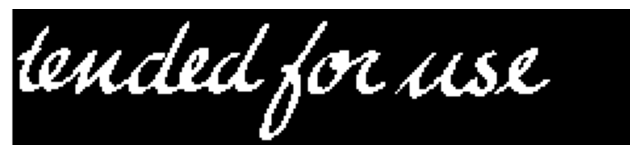

Input Test Image
<scaled size: (56 x 256) >


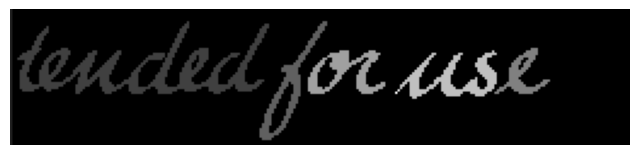

Output Test Image
<scaled size: (56 x 256) >


In [4]:
# Run the program on im1.vx
vd.dispmvx("im1.vx", capt="Input Test Image")

# Execute Command
q5_test_out = vx.Vx()
exec(vx.vxsh( 'vcclabel if=im1.vx of=$q5_test_out'))
vd.dispmvx(q5_test_out, capt="Output Test Image")

Discussion: Different components (letters that are not connected to each other) are in different shades of gray. Thus, the program works well in this test case.

In [136]:
# Create more useful test images
!testim2
!testim3

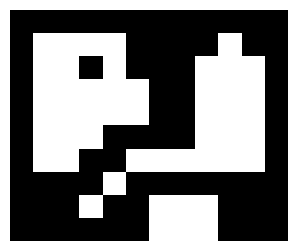

Input Test Image
<scaled size: (10 x 12) >


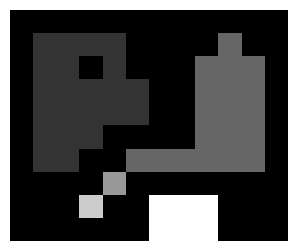

Output Test Image
<scaled size: (10 x 12) >


In [137]:
# Run the program on testim2.vx
vd.dispmvx("testim2.vx", capt="Input Test Image")

# Execute Command
q5_test_out = vx.Vx()
exec(vx.vxsh( 'vcclabel if=testim2.vx of=$q5_test_out'))
vd.dispmvx(q5_test_out, capt="Output Test Image")

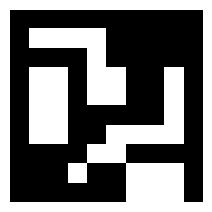

Input Test Image
<scaled size: (10 x 10) >


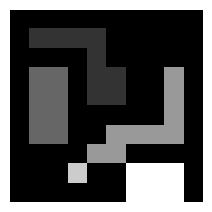

Output Test Image
<scaled size: (10 x 10) >


In [138]:
# Run the program on testim3.vx
vd.dispmvx("testim3.vx", capt="Input Test Image")

# Execute Command
q5_test_out = vx.Vx()
exec(vx.vxsh( 'vcclabel if=testim3.vx of=$q5_test_out'))
vd.dispmvx(q5_test_out, capt="Output Test Image")

Discussion: If the inputs of the program are testim2 and testim3, the program works well as all components are correctly labeled. Even some objects satisfy the 8-connection condition (with diagonal connection), those objects are labeled separately.